In [1]:
import pandas as pd

# Load the two datasets you generated
clinical_df = pd.read_csv('synthetic_clinical_data.csv')
sdoh_df = pd.read_csv('synthetic_sdoh_data.csv')

print("Clinical Data Shape:", clinical_df.shape)
print("SDOH Data Shape:", sdoh_df.shape)

# Perform the merge operation on the common 'District_ID' column
# A 'left' join keeps every record from the left DataFrame (clinical_df)
#merged_df = pd.merge(clinical_df, sdoh_df, on='District_ID', how='left')

#rint("\nShape of the merged dataset:", merged_df.shape)
#print("First 5 rows of the merged dataset:")
#print(merged_df.head())

Clinical Data Shape: (50000, 9)
SDOH Data Shape: (15, 13)


In [2]:
print(clinical_df.head())
print(sdoh_df.head())

   Patient_ID  District_ID  Age     Sex        BMI  Has_Hypertension  \
0        1001          512   36    Male  26.622757                 0   
1        1002          502   60    Male  36.609112                 1   
2        1003          507   30  Female  26.377130                 0   
3        1004          508   78    Male  25.492872                 0   
4        1005          514   78  Female  19.010602                 1   

   Has_High_Cholesterol  Family_History_Diabetes  Has_Disease  
0                     0                        0            0  
1                     1                        0            0  
2                     0                        0            0  
3                     1                        0            0  
4                     1                        1            0  
   District_ID District_Name  Pct_Pop_Below_Poverty  Pct_Scheduled_Caste  \
0          501  District_501              21.398443            20.421702   
1          502  District_502   

In [3]:
# Perform the merge operation on the common 'District_ID' column
# A 'left' join keeps every record from the left DataFrame (clinical_df)
merged_df = pd.merge(clinical_df, sdoh_df, on='District_ID', how='left')

print("\nShape of the merged dataset:", merged_df.shape)
print("First 5 rows of the merged dataset:")
print(merged_df.head())


Shape of the merged dataset: (50000, 21)
First 5 rows of the merged dataset:
   Patient_ID  District_ID  Age     Sex        BMI  Has_Hypertension  \
0        1001          512   36    Male  26.622757                 0   
1        1002          502   60    Male  36.609112                 1   
2        1003          507   30  Female  26.377130                 0   
3        1004          508   78    Male  25.492872                 0   
4        1005          514   78  Female  19.010602                 1   

   Has_High_Cholesterol  Family_History_Diabetes  Has_Disease District_Name  \
0                     0                        0            0  District_512   
1                     1                        0            0  District_502   
2                     0                        0            0  District_507   
3                     1                        0            0  District_508   
4                     1                        1            0  District_514   

   ...  Pct_Sc

In [4]:
# --- Feature Engineering: Separate features (X) from the target (y) ---

# 1. Define the Target (y)
# 'y' is ONLY the 'Has_Disease' column. This is the "answer" we want to predict.
y = merged_df['Has_Disease']

# 2. Define the Features (X)
# 'X' is everything else that could be a useful predictor.
# We start with the full merged_df and DROP the columns that are not predictive.
X = merged_df.drop(columns=['Has_Disease', 'Patient_ID', 'District_Name'])  # Drop target and ID columns

# --- Preprocessing: Handle Categorical Features in X ---
# Now we preprocess the 'X' DataFrame.
# We convert text columns ('Sex') into numbers.
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

print("\nShape of features (X) after one-hot encoding:", X.shape)
print("First 5 rows of the processed features (X):")
print(X.head())


Shape of features (X) after one-hot encoding: (50000, 18)
First 5 rows of the processed features (X):
   District_ID  Age        BMI  Has_Hypertension  Has_High_Cholesterol  \
0          512   36  26.622757                 0                     0   
1          502   60  36.609112                 1                     1   
2          507   30  26.377130                 0                     0   
3          508   78  25.492872                 0                     1   
4          514   78  19.010602                 1                     1   

   Family_History_Diabetes  Pct_Pop_Below_Poverty  Pct_Scheduled_Caste  \
0                        0              40.980727            38.856278   
1                        0              35.897038            40.824700   
2                        0              13.284119            10.443988   
3                        0              34.159535            38.047746   
4                        1              19.915855            27.757460   

   Avg_

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb

# --- 1. Load the datasets ---
clinical_df = pd.read_csv('synthetic_clinical_data.csv')
sdoh_df = pd.read_csv('synthetic_sdoh_data.csv')

# --- 2. Merge on 'District_ID' ---
merged_df = pd.merge(clinical_df, sdoh_df, on='District_ID', how='left')
print("Merged dataset shape:", merged_df.shape)
print(merged_df.head())

# --- 3. Feature Engineering: Separate features (X) from the target (y) ---
y = merged_df['Has_Disease']
X = merged_df.drop(columns=['Has_Disease', 'Patient_ID', 'District_Name'])

# --- 4. Preprocessing: Handle categorical features ---
# Convert 'Sex' to numeric (one-hot encoding)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

print("\nShape of features (X) after one-hot encoding:", X.shape)
print("First 5 rows of the processed features (X):")
print(X.head())

# --- 5. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 6. Model Training with LightGBM ---
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# --- 7. Prediction and Evaluation ---
y_pred = lgbm.predict(X_test)
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Merged dataset shape: (50000, 21)
   Patient_ID  District_ID  Age     Sex        BMI  Has_Hypertension  \
0        1001          512   36    Male  26.622757                 0   
1        1002          502   60    Male  36.609112                 1   
2        1003          507   30  Female  26.377130                 0   
3        1004          508   78    Male  25.492872                 0   
4        1005          514   78  Female  19.010602                 1   

   Has_High_Cholesterol  Family_History_Diabetes  Has_Disease District_Name  \
0                     0                        0            0  District_512   
1                     1                        0            0  District_502   
2                     0                        0            0  District_507   
3                     1                        0            0  District_508   
4                     1                        1            0  District_514   

   ...  Pct_Scheduled_Caste  Avg_Household_Income  Pct_Ill

Merged dataset shape: (50000, 21)
   Patient_ID  District_ID  Age     Sex        BMI  Has_Hypertension  \
0        1001          512   36    Male  26.622757                 0   
1        1002          502   60    Male  36.609112                 1   
2        1003          507   30  Female  26.377130                 0   
3        1004          508   78    Male  25.492872                 0   
4        1005          514   78  Female  19.010602                 1   

   Has_High_Cholesterol  Family_History_Diabetes  Has_Disease District_Name  \
0                     0                        0            0  District_512   
1                     1                        0            0  District_502   
2                     0                        0            0  District_507   
3                     1                        0            0  District_508   
4                     1                        1            0  District_514   

   ...  Pct_Scheduled_Caste  Avg_Household_Income  Pct_Ill

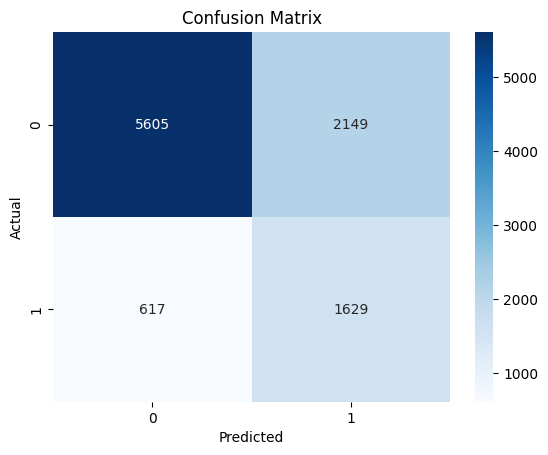

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

clinical_df = pd.read_csv('synthetic_clinical_data.csv')
sdoh_df = pd.read_csv('synthetic_sdoh_data.csv')

# --- 2. Merge on 'District_ID' ---
merged_df = pd.merge(clinical_df, sdoh_df, on='District_ID', how='left')
print("Merged dataset shape:", merged_df.shape)
print(merged_df.head())

# --- 3. Feature Engineering: Separate features (X) from the target (y) ---
y = merged_df['Has_Disease']
X = merged_df.drop(columns=['Has_Disease', 'Patient_ID', 'District_Name'])

# --- 4. Preprocessing: Handle categorical features ---
# Convert 'Sex' to numeric (one-hot encoding)
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)


# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train LightGBM with class_weight
lgbm = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
lgbm.fit(X_train, y_train)

# Predict
y_pred = lgbm.predict(X_test)

# Evaluation
print("\nAccuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()